In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [40]:
law_enf = pd.read_excel("okle_new_york.xls", skiprows=4)

In [41]:
law_enf.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [42]:
law_enf['Population^2'] = law_enf['Population'] ** 2

In [43]:
law_enf.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population^2
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07


In [44]:
law_enf.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Population^2'],
      dtype='object')

In [45]:
law_enf = law_enf.rename(columns=lambda x:x.strip())
law_enf = law_enf.rename(columns=lambda x: x.replace('\n', ' '))

In [46]:
law_enf.columns

Index(['City', 'Population', 'Violent crime',
       'Murder and nonnegligent manslaughter', 'Rape (revised definition)1',
       'Rape (legacy definition)2', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny- theft', 'Motor vehicle theft',
       'Arson3', 'Population^2'],
      dtype='object')

In [49]:
law_enf['Murder'] = law_enf['Murder and nonnegligent manslaughter'] > 0

In [50]:
law_enf['Robbery'] = law_enf['Robbery'] > 0

In [51]:
law_enf[['Population', 'Population^2', 'Murder', 'Robbery']].head()

,Population,Population^2,Murder,Robbery
0,1861.0,3.463321e+06,False,False
1,2577.0,6.640929e+06,False,False
2,2846.0,8.099716e+06,False,False
3,97956.0,9.595378e+09,True,True
4,6388.0,4.080654e+07,False,True


In [70]:
columns = ['Population', 'Population^2', 'Murder', 'Robbery']

In [73]:
law_enf.loc[law_enf[columns].isnull().any(axis=1),]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population^2,Murder
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [76]:
law_enf = law_enf.iloc[:348]

In [78]:
regr = linear_model.LinearRegression()
Y = law_enf['Property crime'].values.reshape(-1, 1)
X = law_enf[['Population','Population^2','Murder','Robbery']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.9961247104988709


In [80]:
law_enf.corr()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population^2,Murder
Population,1.000000,0.998854,0.986758,NaN,0.990839,0.064371,0.999134,0.996265,0.970578,0.997946,0.992421,0.701761,0.998264,0.162309
Violent crime,0.998854,1.000000,0.992098,NaN,0.994985,0.057714,0.999942,0.998059,0.978150,0.998762,0.996271,0.917793,0.996575,0.165904
Murder and nonnegligent manslaughter,0.986758,0.992098,1.000000,NaN,0.997746,0.069557,0.990843,0.995403,0.993733,0.993175,0.997992,0.963200,0.979574,0.211661
Rape (revised definition)1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rape (legacy definition)2,0.990839,0.994985,0.997746,NaN,1.000000,0.076546,0.994140,0.997843,0.992442,0.996260,0.998764,0.926301,0.984331,0.201359
Robbery,0.064371,0.057714,0.069557,NaN,0.076546,1.000000,0.056878,0.079318,0.098352,0.076913,0.070604,0.165537,0.043983,0.313271
Aggravated assault,0.999134,0.999942,0.990843,NaN,0.994140,0.056878,1.000000,0.997622,0.976288,0.998561,0.995403,0.888278,0.997248,0.163747
Property crime,0.996265,0.998059,0.995403,NaN,0.997843,0.079318,0.997622,1.000000,0.987137,0.999666,0.998302,0.920765,0.991027,0.190670
Burglary,0.970578,0.978150,0.993733,NaN,0.992442,0.098352,0.976288,0.987137,1.000000,0.982700,0.991464,0.952121,0.958563,0.240979
Larceny- theft,0.997946,0.998762,0.993175,NaN,0.996260,0.076913,0.998561,0.999666,0.982700,1.000000,0.996878,0.893610,0.993778,0.182823


In [82]:
regr = linear_model.LinearRegression()
Y = law_enf['Property crime'].values.reshape(-1, 1)
X = law_enf[['Population^2','Murder','Robbery']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.99256120e-09 1.18406016e+03 3.00052598e+02]]

Intercept: 
 [40.08610471]

R-squared:
0.9859871204030131


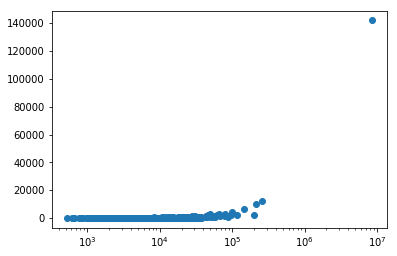

In [88]:
plt.scatter(law_enf['Population'], law_enf['Property crime'])
plt.xscale('log')

In [89]:
law_enf[law_enf['Property crime'] > 100000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population^2,Murder
216,New York,8396126.0,52384.0,335.0,NaN,1112.0,True,31767.0,141971.0,16606.0,117931.0,7434.0,NaN,7.049493e+13,True


In [90]:
law_enf_wo_ny = law_enf.drop(216)

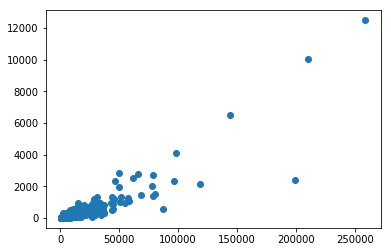

In [99]:
plt.scatter(law_enf_wo_ny['Population'], law_enf_wo_ny['Property crime'])

In [95]:
regr = linear_model.LinearRegression()
Y = law_enf_wo_ny['Property crime'].values.reshape(-1, 1)
X = law_enf_wo_ny[['Population', 'Population^2','Murder','Robbery']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]]

Intercept: 
 [-16.81586632]

R-squared:
0.8444937611173492
